In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt 
from matplotlib import style
import pprint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
%matplotlib inline 

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df_br_2019 = pd.read_csv("/Users/harsh/Documents/DM_prac/DM_innovative/DataBase/CEEW - Smart meter data Bareilly 2019.csv")
df_br_2020 = pd.read_csv("/Users/harsh/Documents/DM_prac/DM_innovative/DataBase/CEEW - Smart meter data Bareilly 2020.csv")
df_br_2021 = pd.read_csv("/Users/harsh/Documents/DM_prac/DM_innovative/DataBase/CEEW - Smart meter data Bareilly 2021.csv")
df_mt_2019 = pd.read_csv("/Users/harsh/Documents/DM_prac/DM_innovative/DataBase/CEEW - Smart meter data Mathura 2019.csv")
df_mt_2020 = pd.read_csv("/Users/harsh/Documents/DM_prac/DM_innovative/DataBase/CEEW - Smart meter data Mathura 2020.csv")
df_mt_2021 = pd.read_csv("/Users/harsh/Documents/DM_prac/DM_innovative/DataBase/CEEW - Smart meter data Mathura 2021.csv")

# Show the data of Bareilly

In [4]:
display(HTML('<h1>Smart Meter Data Bareilly 2019</h1> '))
display(df_br_2019.shape)
display(df_br_2019.head())

display(HTML('<h1>Smart Meter Data Bareilly 2020</h1> '))
display(df_br_2020.shape)
display(df_br_2020.head())

display(HTML('<h1>Smart Meter Data Bareilly 2021</h1> '))
display(df_br_2021.shape)
display(df_br_2021.head())

(2919315, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2019-07-10 00:00:00,0.021,243.10,1.79,50.02,BR02
1,2019-07-10 00:03:00,0.021,242.91,1.80,50.07,BR02
2,2019-07-10 00:06:00,0.021,242.46,1.83,50.00,BR02
3,2019-07-10 00:09:00,0.020,241.27,1.79,49.95,BR02
4,2019-07-10 00:12:00,0.020,240.77,1.79,49.98,BR02


(6627360, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2020-01-01 00:00:00,0.002,251.26,0.15,49.97,BR02
1,2020-01-01 00:03:00,0.001,251.23,0.15,49.94,BR02
2,2020-01-01 00:06:00,0.001,251.55,0.14,49.94,BR02
3,2020-01-01 00:09:00,0.001,251.97,0.14,50.09,BR02
4,2020-01-01 00:12:00,0.002,252.03,0.14,50.08,BR02


(3948960, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2021-01-02 00:00:00,0.002,253.36,0.25,50.09,BR02
1,2021-01-02 00:03:00,0.002,253.87,0.25,50.11,BR02
2,2021-01-02 00:06:00,0.020,253.25,1.67,50.14,BR02
3,2021-01-02 00:09:00,0.045,252.20,3.52,50.12,BR02
4,2021-01-02 00:12:00,0.044,252.28,3.53,50.07,BR02


# Show the data of Mathura

In [5]:
display(HTML('<h1>Smart Meter Data Mathura 2019</h1> '))
display(df_mt_2019.shape)
display(df_mt_2019.head())

display(HTML('<h1>Smart Meter Data Mathura 2020</h1> '))
display(df_mt_2020.shape)
display(df_mt_2020.head())

display(HTML('<h1>Smart Meter Data Mathura 2021</h1> '))
display(df_mt_2021.shape)
display(df_mt_2021.head())

(3588874, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2019-05-01 00:00:00,0.017,252.42,1.32,50.02,MH01
1,2019-05-01 00:03:00,0.016,251.76,1.27,50.01,MH01
2,2019-05-01 00:06:00,0.016,250.26,1.27,50.00,MH01
3,2019-05-01 00:09:00,0.016,250.33,1.27,50.03,MH01
4,2019-05-01 00:12:00,0.015,250.96,1.27,50.02,MH01


(3759360, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2020-01-06 00:00:00,0.004,261.72,1.19,50.14,MH01
1,2020-01-06 00:03:00,0.005,261.96,1.19,50.15,MH01
2,2020-01-06 00:06:00,0.005,261.83,1.21,50.12,MH01
3,2020-01-06 00:09:00,0.005,262.02,1.20,50.08,MH01
4,2020-01-06 00:12:00,0.004,261.66,1.20,50.07,MH01


(550560, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2021-01-02 00:00:00,0.0,0.0,0.0,0.0,MH01
1,2021-01-02 00:03:00,0.0,0.0,0.0,0.0,MH01
2,2021-01-02 00:06:00,0.0,0.0,0.0,0.0,MH01
3,2021-01-02 00:09:00,0.0,0.0,0.0,0.0,MH01
4,2021-01-02 00:12:00,0.0,0.0,0.0,0.0,MH01


# Merge the data of Mathura and Bareilly

In [6]:
display(HTML('<h1>Smart Meter Data Mathura</h1>'))
df1 = df_mt_2019.merge(df_mt_2020,how='outer')
df_mathura = df1.merge(df_mt_2021,how='outer')
display(df_mathura.info())
display(df_mathura.head())


display(HTML('<h1>Smart Meter Data Bareilly</h1>'))
df2 = df_br_2019.merge(df_br_2020,how='outer')
df_bareilly = df2.merge(df_br_2021,how='outer')
display(df_bareilly.info())
display(df_bareilly.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7898794 entries, 0 to 7898793
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   x_Timestamp           object 
 1   t_kWh                 float64
 2   z_Avg Voltage (Volt)  float64
 3   z_Avg Current (Amp)   float64
 4   y_Freq (Hz)           float64
 5   meter                 object 
dtypes: float64(4), object(2)
memory usage: 361.6+ MB


None

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2019-05-01 00:00:00,0.017,252.42,1.32,50.02,MH01
1,2019-05-01 00:03:00,0.016,251.76,1.27,50.01,MH01
2,2019-05-01 00:06:00,0.016,250.26,1.27,50.00,MH01
3,2019-05-01 00:09:00,0.016,250.33,1.27,50.03,MH01
4,2019-05-01 00:12:00,0.015,250.96,1.27,50.02,MH01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495635 entries, 0 to 13495634
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   x_Timestamp           object 
 1   t_kWh                 float64
 2   z_Avg Voltage (Volt)  float64
 3   z_Avg Current (Amp)   float64
 4   y_Freq (Hz)           float64
 5   meter                 object 
dtypes: float64(4), object(2)
memory usage: 617.8+ MB


None

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2019-07-10 00:00:00,0.021,243.10,1.79,50.02,BR02
1,2019-07-10 00:03:00,0.021,242.91,1.80,50.07,BR02
2,2019-07-10 00:06:00,0.021,242.46,1.83,50.00,BR02
3,2019-07-10 00:09:00,0.020,241.27,1.79,49.95,BR02
4,2019-07-10 00:12:00,0.020,240.77,1.79,49.98,BR02


In [7]:
df_bareilly.rename(columns={"x_Timestamp" : 'Timestamp', "t_kWh" : "Electricity_consumption(kWh)",
                  "z_Avg Voltage (Volt)" : "Avg_Voltage(Volt)", "z_Avg Current (Amp)" : "Avg_Current(Amp)",
                 "y_Freq (Hz)" : "Freq(Hz)" ,"meter" : "Smart_Meter" },inplace=True)
df_mathura.rename(columns={"x_Timestamp" : 'Timestamp', "t_kWh" : "Electricity_consumption(kWh)",
                  "z_Avg Voltage (Volt)" : "Avg_Voltage(Volt)", "z_Avg Current (Amp)" : "Avg_Current(Amp)",
                 "y_Freq (Hz)" : "Freq(Hz)" ,"meter" : "Smart_Meter" },inplace=True)

# convert kwh to wh
df_mathura['Electricity_consumption(Wh)'] = df_mathura['Electricity_consumption(kWh)'].apply(lambda x: x * 1000)
df_bareilly['Electricity_consumption(Wh)'] = df_bareilly['Electricity_consumption(kWh)'].apply(lambda x: x * 1000)
df_mathura = df_mathura.sort_values(by='Timestamp')
df_bareilly = df_bareilly.sort_values(by='Timestamp')
display(df_bareilly.head(5))
display(df_mathura.head(5))

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Electricity_consumption(Wh)
2866516,2019-05-09 00:00:00,0.03,224.97,2.95,49.99,BR52,30.0
2866517,2019-05-09 00:03:00,0.03,227.41,2.86,49.99,BR52,30.0
2866518,2019-05-09 00:06:00,0.03,227.75,2.85,49.94,BR52,30.0
2866519,2019-05-09 00:09:00,0.03,226.92,2.85,49.96,BR52,30.0
2866520,2019-05-09 00:12:00,0.03,225.67,2.86,49.99,BR52,30.0


,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Electricity_consumption(Wh)
0,2019-05-01 00:00:00,0.017,252.42,1.32,50.02,MH01,17.0
1584718,2019-05-01 00:00:00,0.088,210.33,8.47,50.04,MH22,88.0
1090880,2019-05-01 00:00:00,0.009,233.70,0.83,50.06,MH15,9.0
1474283,2019-05-01 00:00:00,0.074,236.39,6.60,50.08,MH21,74.0
304772,2019-05-01 00:00:00,0.024,156.24,3.19,50.02,MH06,24.0


In [8]:
def reduce_mem_usage(df):
    """iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:4] == "uint":
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif (
                    c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max
                ):
                    df[col] = df[col].astype(np.uint16)
                elif (
                    c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max
                ):
                    df[col] = df[col].astype(np.uint32)
                elif (
                    c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max
                ):
                    df[col] = df[col].astype(np.uint64)
            else:
                # can't be smaller than that because of the parquet file format
                if (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df


df_bareilly = reduce_mem_usage(df_bareilly)
df_mathura = reduce_mem_usage(df_mathura)

Memory usage of dataframe is 823.71 MB
Memory usage after optimization is: 444.09 MB
Decreased by 46.1%
Memory usage of dataframe is 482.10 MB
Memory usage after optimization is: 259.04 MB
Decreased by 46.3%


In [9]:
def aggregate_data(df):
    # Convert 'Timestamp' column to datetime if it's not already in datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Group by 'Timestamp' and sum the 'Electricity_consumption(Wh)' values
    aggregated_df = df.groupby(df['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S'))['Electricity_consumption(Wh)'].sum().reset_index()
    
    return aggregated_df

aggregated_df_mathura = aggregate_data(df_mathura)
display(aggregated_df_mathura.head(3))
aggregated_df_bareilly = aggregate_data(df_bareilly)
display(aggregated_df_bareilly.head(3))

,Timestamp,Electricity_consumption(Wh)
0,2019-05-01 00:00:00,804.0
1,2019-05-01 00:03:00,756.0
2,2019-05-01 00:06:00,735.0


,Timestamp,Electricity_consumption(Wh)
0,2019-05-09 00:00:00,30.0
1,2019-05-09 00:03:00,30.0
2,2019-05-09 00:06:00,30.0


In [15]:
def apply_EDA(df):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df["Month"] = df["Timestamp"].dt.month
    df["Year"] = df["Timestamp"].dt.year
    df["Date"] = df["Timestamp"].dt.date
    df["Time"] = df["Timestamp"].apply(lambda x:x.time())
    df["Hour"] = df["Timestamp"].dt.hour
    df["Week"] = df["Timestamp"].dt.isocalendar().week
    df["Day"] = df["Timestamp"].dt.day
    df = df.set_index("Timestamp")
    df.index = pd.to_datetime(df.index)
    return df

df_bareilly = apply_EDA(aggregated_df_bareilly)
display(df_bareilly.head(3))
df_mathura = apply_EDA(aggregated_df_mathura)
display(df_mathura.head(3))

,Electricity_consumption(Wh),Month,Year,Date,Time,Week,Day,Hour
Timestamp,,,,,,,,
2019-05-09 00:00:00,30.0,5,2019,2019-05-09,00:00:00,19,9,0
2019-05-09 00:03:00,30.0,5,2019,2019-05-09,00:03:00,19,9,0
2019-05-09 00:06:00,30.0,5,2019,2019-05-09,00:06:00,19,9,0


,Electricity_consumption(Wh),Month,Year,Date,Time,Week,Day,Hour
Timestamp,,,,,,,,
2019-05-01 00:00:00,804.0,5,2019,2019-05-01,00:00:00,18,1,0
2019-05-01 00:03:00,756.0,5,2019,2019-05-01,00:03:00,18,1,0
2019-05-01 00:06:00,735.0,5,2019,2019-05-01,00:06:00,18,1,0


In [16]:
display(df_mathura.info())
display(df_bareilly.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313440 entries, 2019-05-01 00:00:00 to 2021-02-20 23:57:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Electricity_consumption(Wh)  313440 non-null  float32
 1   Month                        313440 non-null  int32  
 2   Year                         313440 non-null  int32  
 3   Date                         313440 non-null  object 
 4   Time                         313440 non-null  object 
 5   Week                         313440 non-null  UInt32 
 6   Day                          313440 non-null  int32  
 7   Hour                         313440 non-null  int32  
dtypes: UInt32(1), float32(1), int32(4), object(2)
memory usage: 14.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424799 entries, 2019-05-09 00:00:00 to 2021-10-31 23:57:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Electricity_consumption(Wh)  424799 non-null  float32
 1   Month                        424799 non-null  int32  
 2   Year                         424799 non-null  int32  
 3   Date                         424799 non-null  object 
 4   Time                         424799 non-null  object 
 5   Week                         424799 non-null  UInt32 
 6   Day                          424799 non-null  int32  
 7   Hour                         424799 non-null  int32  
dtypes: UInt32(1), float32(1), int32(4), object(2)
memory usage: 19.9+ MB


None

In [17]:
mathura_season = df_mathura
mathura_season["Season"] = [ "Winter" if i < 3 or i > 11 else "Spring" if 3 <= i < 6 else "Summer" if 6 <= i < 9 else "Autumn" for i in mathura_season["Month"]]
mathura_season.head()

bareilly_season = df_bareilly
bareilly_season["Season"] = [ "Winter" if i < 3 or i > 11 else "Spring" if 3 <= i < 6 else "Summer" if 6 <= i < 9 else "Autumn" for i in bareilly_season["Month"]]
bareilly_season.head()

,Electricity_consumption(Wh),Month,Year,Date,Time,Week,Day,Hour,Season
Timestamp,,,,,,,,,
2019-05-09 00:00:00,30.0,5,2019,2019-05-09,00:00:00,19,9,0,Spring
2019-05-09 00:03:00,30.0,5,2019,2019-05-09,00:03:00,19,9,0,Spring
2019-05-09 00:06:00,30.0,5,2019,2019-05-09,00:06:00,19,9,0,Spring
2019-05-09 00:09:00,30.0,5,2019,2019-05-09,00:09:00,19,9,0,Spring
2019-05-09 00:12:00,30.0,5,2019,2019-05-09,00:12:00,19,9,0,Spring


<Axes: xlabel='Season', ylabel='Hour'>

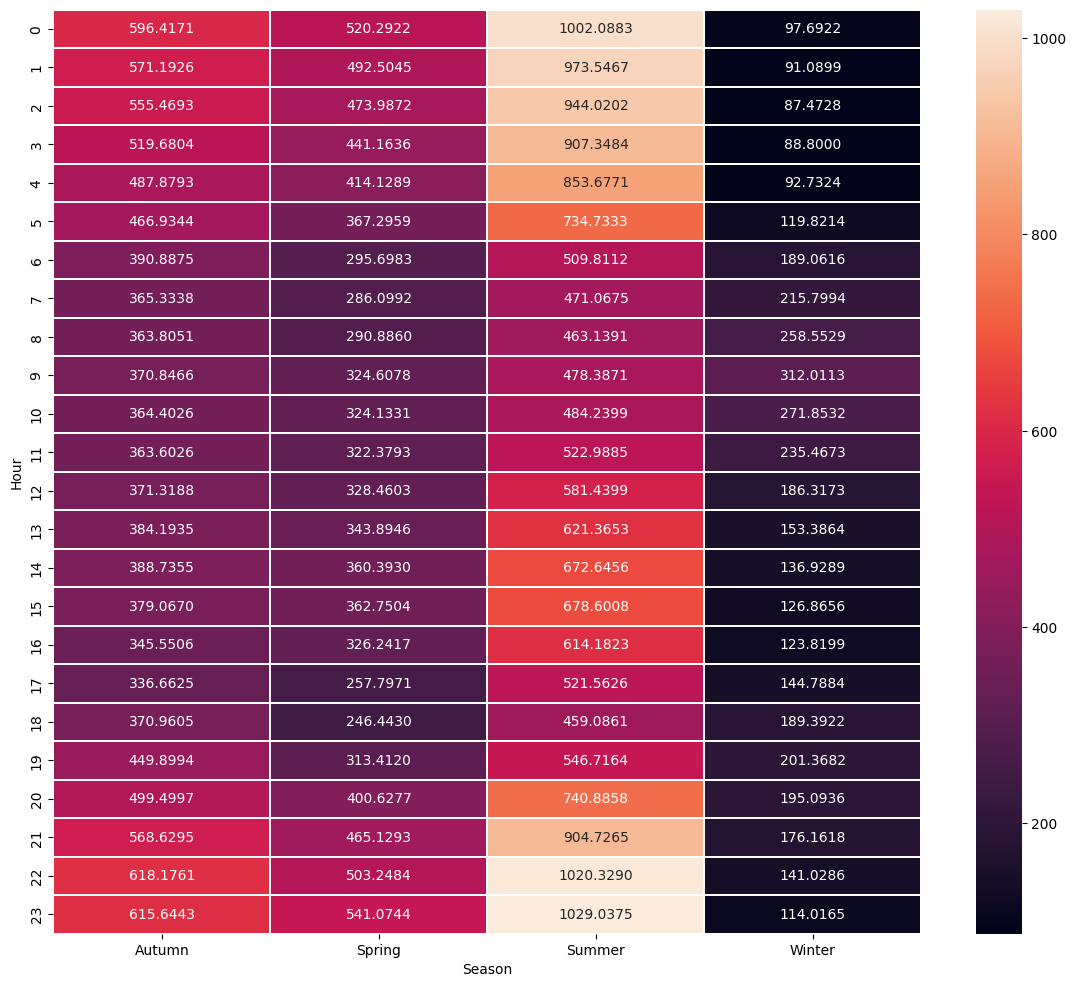

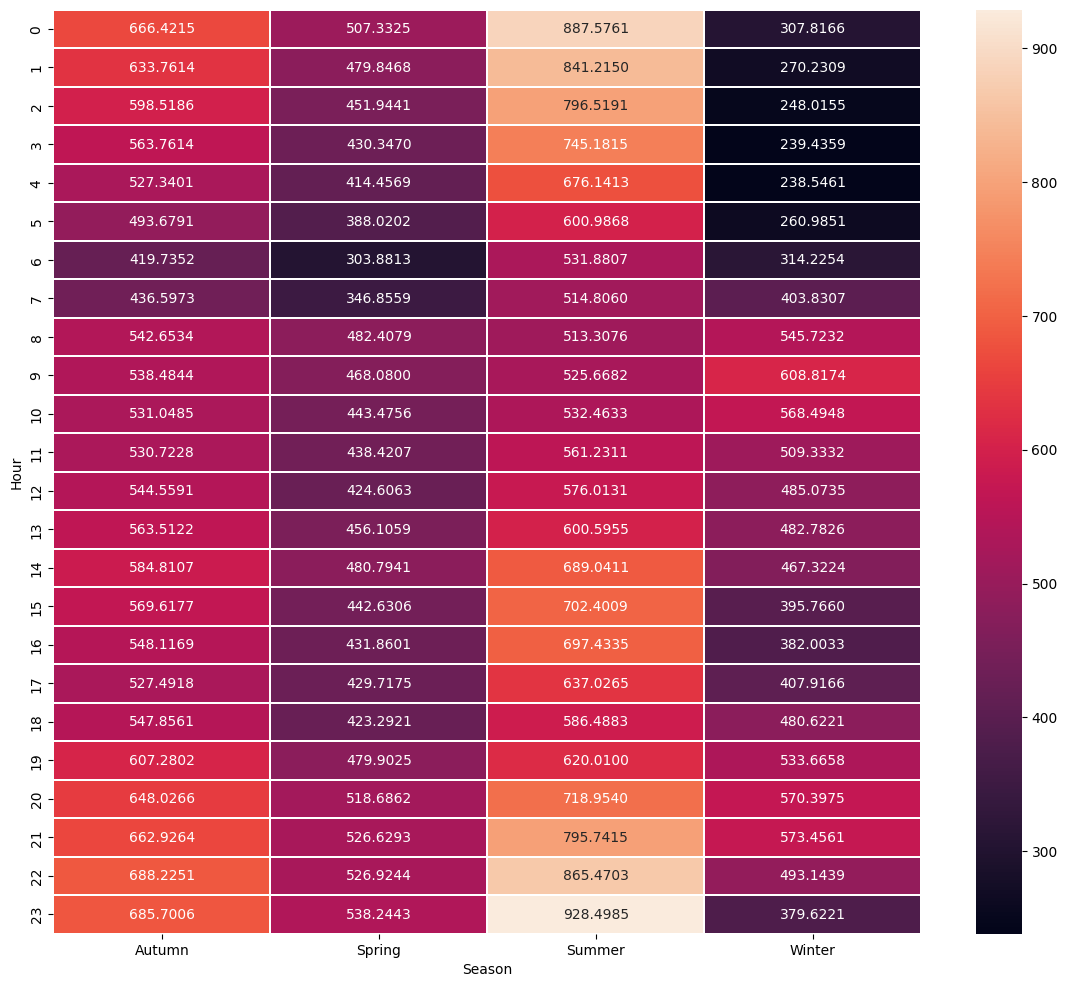

In [18]:
table_mathura = pd.pivot_table(mathura_season, values = "Electricity_consumption(Wh)", columns = "Season", index = "Hour", aggfunc = np.mean )
table_bareilly = pd.pivot_table(bareilly_season, values = "Electricity_consumption(Wh)", columns = "Season", index = "Hour", aggfunc = np.mean )


plt.figure(figsize=(14,12))
sns.heatmap(table_mathura, annot = True, fmt = ".4f", linewidth = 0.2 )
plt.figure(figsize=(14,12))
sns.heatmap(table_bareilly, annot = True, fmt = ".4f", linewidth = 0.2 )

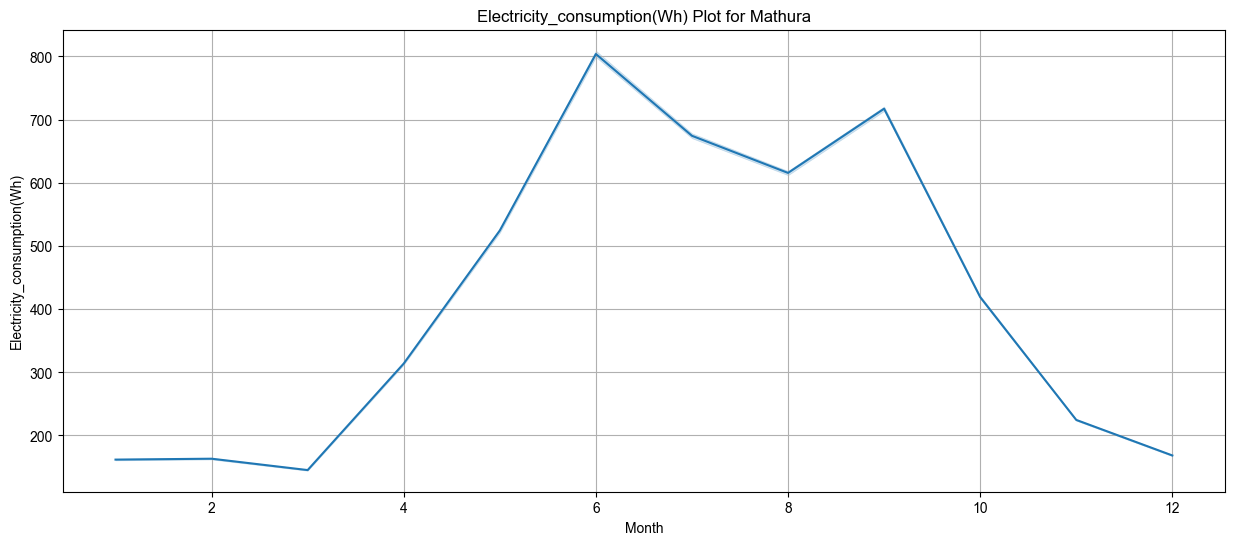

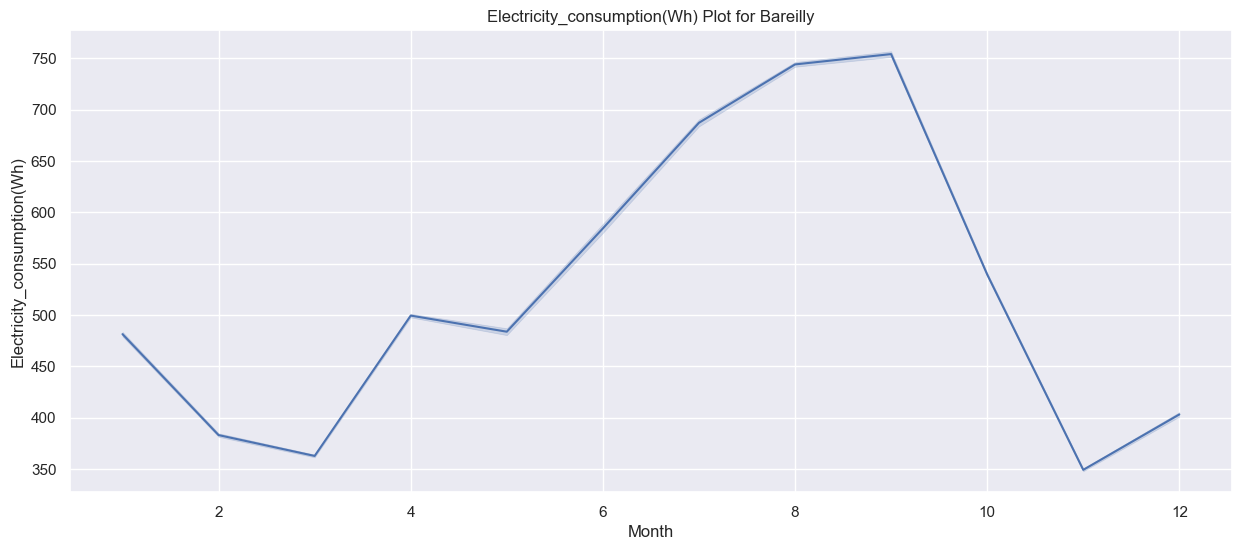

In [19]:
def plt_month_vs_energy_consumption(df, place):
    # Set the figure size
    plt.figure(figsize=(15, 6))
    ax1 = plt.subplot2grid((1,1),(0,0))
    style.use('ggplot')
    sns.lineplot(x=df["Month"],y=df["Electricity_consumption(Wh)"])
    sns.set(rc={'figure.figsize':(15,6)})
    plt.title(f'Electricity_consumption(Wh) Plot for {place}')
    plt.xlabel('Month')
    plt.ylabel('Electricity_consumption(Wh)')
    plt.grid(True)
    plt.show()

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(90)
    
plt_month_vs_energy_consumption(df_mathura,"Mathura")
plt_month_vs_energy_consumption(df_bareilly,"Bareilly")

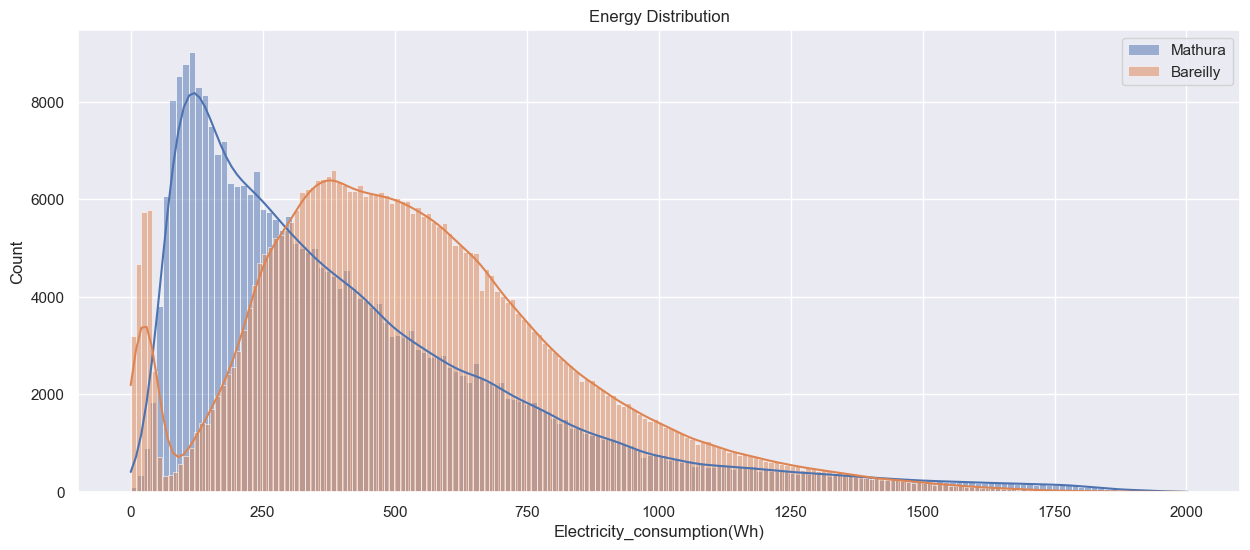

In [20]:
def plt_energy_consumption(df, place):
    sns.histplot(df["Electricity_consumption(Wh)"], kde=True, label=place)
    plt.legend()
    plt.title("Energy Distribution")

plt_energy_consumption(df_mathura, "Mathura")
plt_energy_consumption(df_bareilly, "Bareilly")

### Resampling the data

In [21]:
display(df_mathura.info())
display(df_mathura.head(5))
display(df_bareilly.info())
display(df_bareilly.head(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313440 entries, 2019-05-01 00:00:00 to 2021-02-20 23:57:00
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Electricity_consumption(Wh)  313440 non-null  float32
 1   Month                        313440 non-null  int32  
 2   Year                         313440 non-null  int32  
 3   Date                         313440 non-null  object 
 4   Time                         313440 non-null  object 
 5   Week                         313440 non-null  UInt32 
 6   Day                          313440 non-null  int32  
 7   Hour                         313440 non-null  int32  
 8   Season                       313440 non-null  object 
dtypes: UInt32(1), float32(1), int32(4), object(3)
memory usage: 17.0+ MB


None

,Electricity_consumption(Wh),Month,Year,Date,Time,Week,Day,Hour,Season
Timestamp,,,,,,,,,
2019-05-01 00:00:00,804.0,5,2019,2019-05-01,00:00:00,18,1,0,Spring
2019-05-01 00:03:00,756.0,5,2019,2019-05-01,00:03:00,18,1,0,Spring
2019-05-01 00:06:00,735.0,5,2019,2019-05-01,00:06:00,18,1,0,Spring
2019-05-01 00:09:00,732.0,5,2019,2019-05-01,00:09:00,18,1,0,Spring
2019-05-01 00:12:00,691.0,5,2019,2019-05-01,00:12:00,18,1,0,Spring


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424799 entries, 2019-05-09 00:00:00 to 2021-10-31 23:57:00
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Electricity_consumption(Wh)  424799 non-null  float32
 1   Month                        424799 non-null  int32  
 2   Year                         424799 non-null  int32  
 3   Date                         424799 non-null  object 
 4   Time                         424799 non-null  object 
 5   Week                         424799 non-null  UInt32 
 6   Day                          424799 non-null  int32  
 7   Hour                         424799 non-null  int32  
 8   Season                       424799 non-null  object 
dtypes: UInt32(1), float32(1), int32(4), object(3)
memory usage: 23.1+ MB


None

,Electricity_consumption(Wh),Month,Year,Date,Time,Week,Day,Hour,Season
Timestamp,,,,,,,,,
2019-05-09 00:00:00,30.0,5,2019,2019-05-09,00:00:00,19,9,0,Spring
2019-05-09 00:03:00,30.0,5,2019,2019-05-09,00:03:00,19,9,0,Spring
2019-05-09 00:06:00,30.0,5,2019,2019-05-09,00:06:00,19,9,0,Spring
2019-05-09 00:09:00,30.0,5,2019,2019-05-09,00:09:00,19,9,0,Spring
2019-05-09 00:12:00,30.0,5,2019,2019-05-09,00:12:00,19,9,0,Spring


In [22]:
df_mathura_filtered = df_mathura[['Date', 'Electricity_consumption(Wh)']]
df_mathura_filtered.loc[:, 'Date'] = pd.to_datetime(df_mathura_filtered['Date'])

# Group by 'Date' column and aggregate other columns
aggregated_data_mathura = df_mathura_filtered.groupby('Date').agg({
    'Electricity_consumption(Wh)': 'sum'
}).reset_index()

# Display the aggregated data
print(aggregated_data_mathura)

          Date  Electricity_consumption(Wh)
0   2019-05-01                     200880.0
1   2019-05-02                     195979.0
2   2019-05-03                     196059.0
3   2019-05-04                     207970.0
4   2019-05-05                     207816.0
..         ...                          ...
648 2021-02-16                      98291.0
649 2021-02-17                     101837.0
650 2021-02-18                      67589.0
651 2021-02-19                      43717.0
652 2021-02-20                      26712.0

[653 rows x 2 columns]


In [23]:
df_bareilly_filtered = df_bareilly[['Date', 'Electricity_consumption(Wh)']]
df_bareilly_filtered.loc[:, 'Date'] = pd.to_datetime(df_bareilly_filtered['Date'])

# Group by 'Date' column and aggregate other columns
aggregated_data_bareilly = df_bareilly_filtered.groupby('Date').agg({
    'Electricity_consumption(Wh)': 'sum'
}).reset_index()

# Display the aggregated data
print(aggregated_data_bareilly)

          Date  Electricity_consumption(Wh)
0   2019-05-09                      11044.0
1   2019-05-10                      11930.0
2   2019-05-11                      14496.0
3   2019-05-12                      14277.0
4   2019-05-13                      10201.0
..         ...                          ...
880 2021-10-27                     162623.0
881 2021-10-28                     153386.0
882 2021-10-29                     151909.0
883 2021-10-30                     140220.0
884 2021-10-31                     138209.0

[885 rows x 2 columns]


In [26]:
def split_train_test(data):
    # Splitting data into train and test sets (80% train, 20% test)
    train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
    return train_data, test_data

def prepare_data_for_forecasting(data, window_size):
    X_train = []
    Y_train = []
    
    # Range should be from window_size to END
    for i in range(window_size, len(data)):
        X_train.append(data[i-window_size:i])
        Y_train.append(data[i])
    
    # Convert into Numpy Array
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    return X_train, Y_train

def Use_RNN_on_dataset(data, place):
    train_dt, test_dt = split_train_test(data)
    train_dt = train_dt.iloc[:, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(train_dt.values.reshape(-1, 1))
    data_column = scaled_data
    window_size = 60  
    X_train, Y_train = prepare_data_for_forecasting(data_column, window_size)

    regressor = Sequential()
    
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    
    # regressor.add(LSTM(units=50, return_sequences=True))
    # regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    
    regressor.add(Dense(units=1))
    
    regressor.compile(optimizer='adam', loss='mean_squared_error')

    display(HTML("<h2>Starting the Training ...</h2>"))
    
    regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)
    display(HTML("<h2>Training Completed.</h2>"))
    display(HTML("<h2>Evaluation Starting ...</h2>"))
    testing_df = pd.concat((test_dt['Electricity_consumption(Wh)'],data['Electricity_consumption(Wh)']),axis=0)
    inputs = testing_df[len(testing_df) - len(test_dt) - 60:].values
    # We need to Reshape
    inputs = inputs.reshape(-1,1)
    # Normalize the Dataset
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i])

    # Convert into Numpy Array
    X_test = np.array(X_test)

    # Reshape before Passing to Network
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Pass to Model
    predicted_energy_value = regressor.predict(X_test)

    # Do inverse Transformation to get Values
    predicted_energy_value = scaler.inverse_transform(predicted_energy_value)

    Actual_data = test_dt['Electricity_consumption(Wh)'].to_list()
    Predicted_data  = predicted_energy_value
    dates = test_dt.index.to_list()

    Machine_Df = pd.DataFrame(data={
        "Date":dates,
        "TrueMegaWatt": Actual_data,
        "PredictedMeagWatt":[x[0] for x in Predicted_data ]
    })

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    x = dates
    y = Actual_data
    y1 = Predicted_data

    # Plot actual values in green
    ax1.plot(x, y, color="green", label='Actual')

    # Plot predicted values in red
    ax1.plot(x, y1, color="red", label='Predicted')

    plt.gcf().autofmt_xdate()
    plt.xlabel('Dates')
    plt.ylabel('Electricity_consumption(Wh)')
    plt.title(f'Machine Learned the Pattern Predicting Future Values for {place}')
    plt.legend()  # Display legend
    plt.show()
    display(HTML('<h2>Evaluation Completed.</h2>'))

Epoch 1/50
15/15 [==============================] - 6s 59ms/step - loss: 0.0462
Epoch 2/50
15/15 [==============================] - 1s 58ms/step - loss: 0.0191
Epoch 3/50
15/15 [==============================] - 1s 57ms/step - loss: 0.0180
Epoch 4/50
15/15 [==============================] - 1s 59ms/step - loss: 0.0170
Epoch 5/50
15/15 [==============================] - 1s 57ms/step - loss: 0.0164
Epoch 6/50
15/15 [==============================] - 1s 57ms/step - loss: 0.0173
Epoch 7/50
15/15 [==============================] - 1s 66ms/step - loss: 0.0156
Epoch 8/50
15/15 [==============================] - 1s 64ms/step - loss: 0.0161
Epoch 9/50
15/15 [==============================] - 1s 62ms/step - loss: 0.0172
Epoch 10/50
15/15 [==============================] - 1s 63ms/step - loss: 0.0150
Epoch 11/50
15/15 [==============================] - 1s 65ms/step - loss: 0.0154
Epoch 12/50
15/15 [==============================] - 1s 63ms/step - loss: 0.0146
Epoch 13/50
15/15 [==================

5/5 [==============================] - 2s 15ms/step


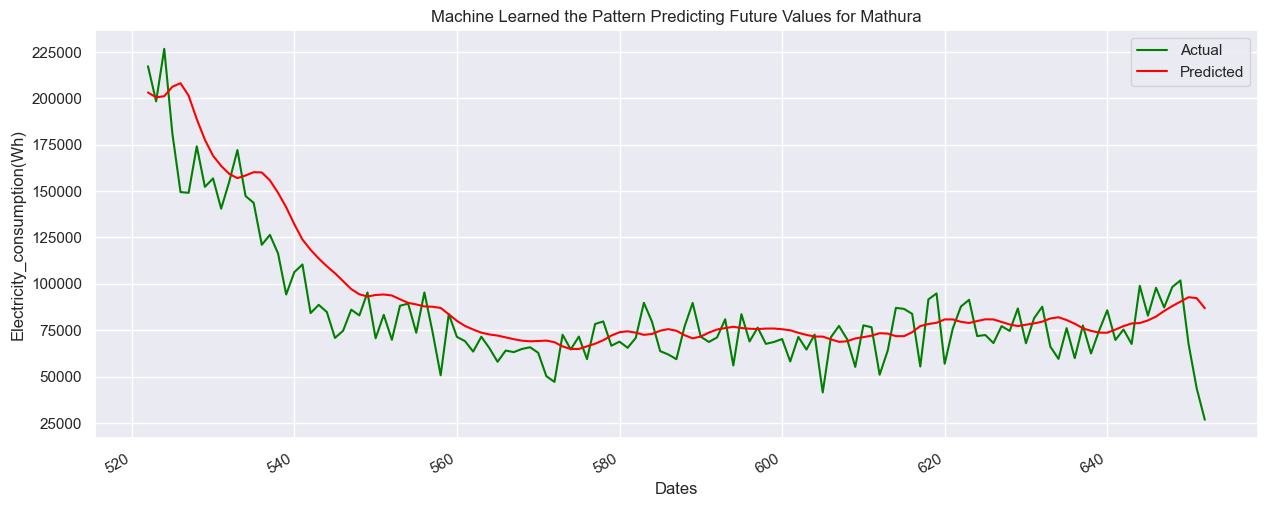

In [27]:
Use_RNN_on_dataset(aggregated_data_mathura,"Mathura")

Epoch 1/50
21/21 [==============================] - 7s 56ms/step - loss: 0.0442
Epoch 2/50
21/21 [==============================] - 1s 61ms/step - loss: 0.0175
Epoch 3/50
21/21 [==============================] - 1s 56ms/step - loss: 0.0140
Epoch 4/50
21/21 [==============================] - 1s 56ms/step - loss: 0.0139
Epoch 5/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0124
Epoch 6/50
21/21 [==============================] - 1s 66ms/step - loss: 0.0120
Epoch 7/50
21/21 [==============================] - 1s 63ms/step - loss: 0.0117
Epoch 8/50
21/21 [==============================] - 1s 61ms/step - loss: 0.0125
Epoch 9/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0117
Epoch 10/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0130
Epoch 11/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0120
Epoch 12/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0104
Epoch 13/50
21/21 [==================

6/6 [==============================] - 1s 14ms/step


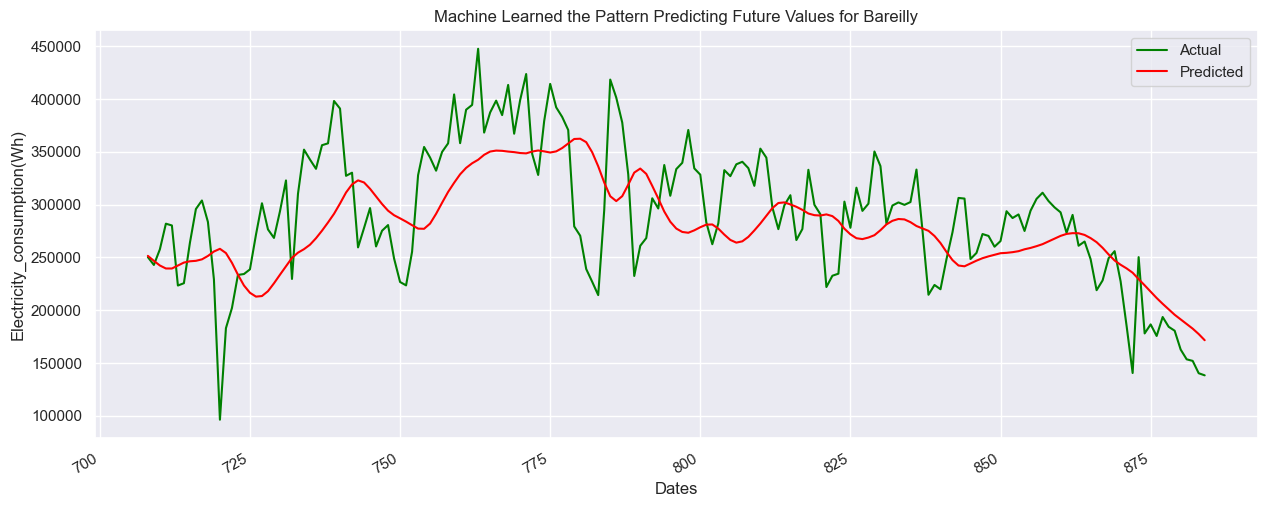

In [28]:
Use_RNN_on_dataset(aggregated_data_bareilly,"Bareilly")